In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.signal import find_peaks

In [2]:
data = pd.read_csv("20231102_AM23NMC00007_CU.csv")

In [3]:
data['Capacity [As]'] = (data['Current[A]'][0:-1] * np.diff(data['Testtime [s]'])).cumsum()
data['SOC'] = (data['Capacity [As]']+abs(min(data['Capacity [As]'])))/max(data['Capacity [As]']+abs(min(data['Capacity [As]']))) # Calculate the SOC and add it to the df

In [4]:
# Step 1：filter the data
filtered_data = data[(data['StepID'] >= 6) & (data['StepID'] <= 9)]

# Step 2：extract the column
filtered_data = filtered_data[[ 'Testtime [s]', 'Voltage[V]', 'Current[A]', 'SOC']]

# Step 3：Saving the extracted data to a new CSV file
output_file_path = 'filtered_data.csv'
filtered_data.to_csv(output_file_path, index=False)

print(f"Data has been saved to {output_file_path}")


Data has been saved to data/filtered_data.csv


In [25]:
filtered_data.shape[0]

63519

In [26]:
# current extract
df = pd.read_csv("filtered_data.csv")

#extract data of current and steptime
df_current = df[['Testtime [s]', 'Current[A]']]

#save the extracted data to the file
df_current.to_csv("current_data.csv", index=False)



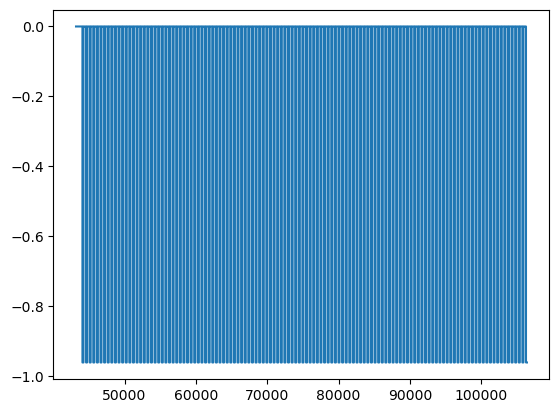

In [23]:
plt.plot(df['Testtime [s]'], df['Current[A]'])

In [31]:
df = pd.read_csv("filtered_data.csv")
voltage = df['Voltage[V]'].values
peaks, _ = find_peaks(voltage, distance=200)

In [32]:
peak_voltages = voltage[peaks]
peak_currents = df['Current[A]'].values[peaks]
peak_testtimes = df['Testtime [s]'].values[peaks]

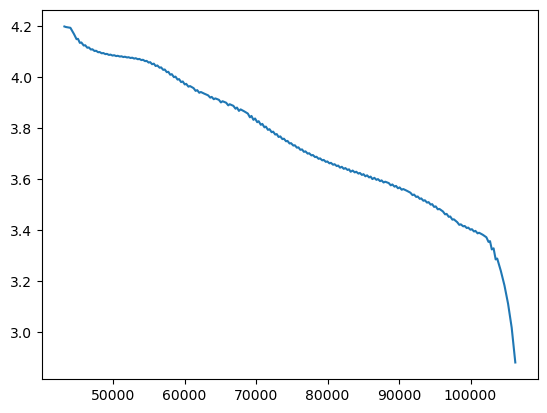

In [33]:
plt.plot(peak_testtimes, peak_voltages)
plt.show()